In [135]:
# Import the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [136]:
# Read the csv file
df = pd.read_csv('data/wine-clustering.csv')
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [137]:
# Control the missing values
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

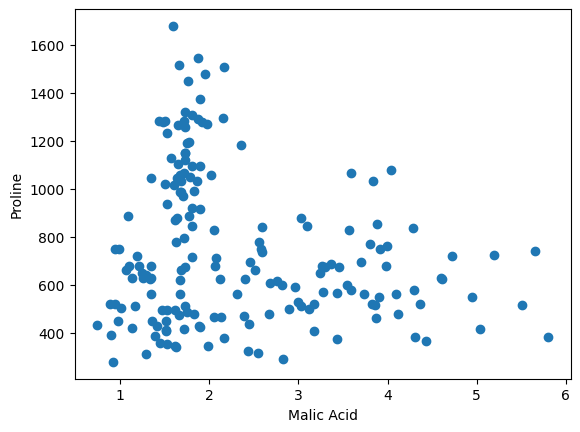

In [172]:
# Visualization malic acid and proline
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.scatter(df.Malic_Acid, df.Proline)
plt.draw()

In [139]:
# Train the model
from sklearn.cluster import KMeans
n = 15
sse = []
for i in range(1, n):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

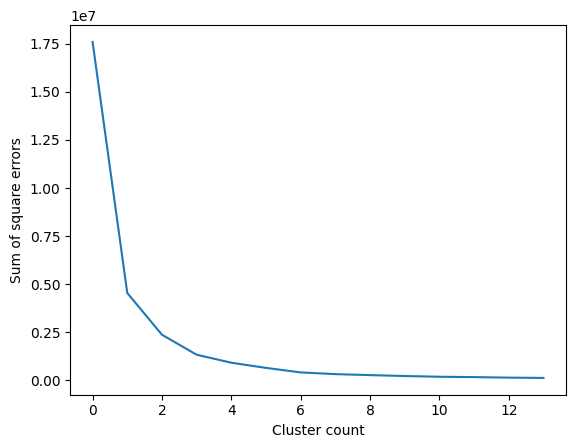

In [140]:
# Plot elbow
plt.xlabel('Cluster count')
plt.ylabel('Sum of square errors')
plt.plot(sse)
plt.draw()

In [147]:
# Predict model
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)
pred = kmeans.predict(df)

In [149]:
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [151]:
df['cluster'] = pred
df.head(2)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1


In [153]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
centroid = kmeans.cluster_centers_
centroid

array([[1.27028455e+01, 2.54455285e+00, 2.33910569e+00, 2.04081301e+01,
        9.68130081e+01, 2.06211382e+00, 1.64146341e+00, 3.92682927e-01,
        1.45406504e+00, 4.85138211e+00, 9.08617886e-01, 2.40821138e+00,
        5.65869919e+02, 6.21138211e+00],
       [1.36665455e+01, 1.87072727e+00, 2.42781818e+00, 1.74527273e+01,
        1.06290909e+02, 2.81618182e+00, 2.89654545e+00, 2.92909091e-01,
        1.89690909e+00, 5.52036364e+00, 1.06665455e+00, 3.06672727e+00,
        1.15172727e+03, 5.80000000e+00]])

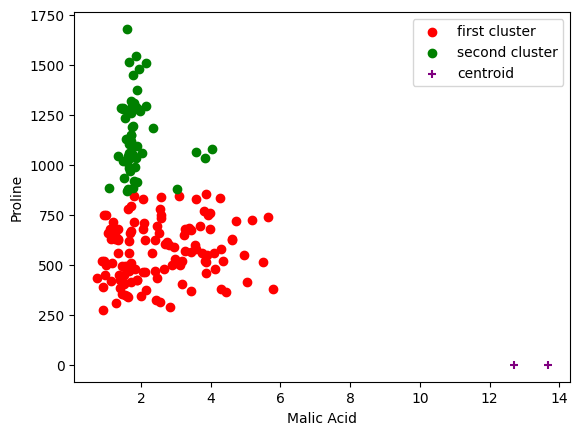

In [173]:
# Visualization clusters
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.scatter(df0.Malic_Acid, df0.Proline, c='r', label='first cluster')
plt.scatter(df1.Malic_Acid, df1.Proline, c='g', label='second cluster')
plt.scatter(centroid[:, 0], centroid[:, 1], c='purple', marker='+', label='centroid')
plt.legend()
plt.draw()

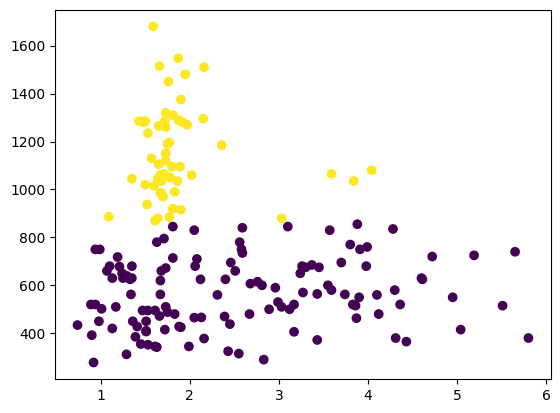

In [174]:
# Visualization clusters
x_axis = df.loc[:, ['Malic_Acid']]
y_axis = df.loc[:, ['Proline']]

plt.scatter(x_axis, y_axis, c=pred)
plt.draw()

In [175]:
# Scaling the datas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_with_scale = scaler.fit_transform(df.drop('cluster', axis=1))
df_with_scale = pd.DataFrame(df_with_scale, columns=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'])

In [181]:
# Training the model and predict
kmeans = KMeans(n_clusters=2)
kmeans.fit(df_with_scale)
pred = kmeans.predict(df_with_scale)

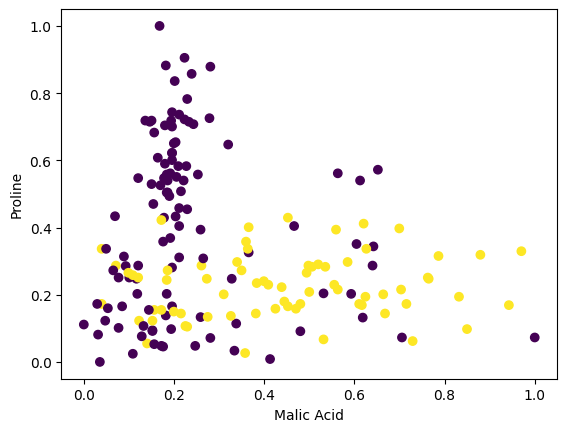

In [182]:
# Visualization clusters
x_axis = df_with_scale.loc[:, ['Malic_Acid']]
y_axis = df_with_scale.loc[:, ['Proline']]
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.scatter(x_axis, y_axis, c=pred)
plt.draw()

#### Clustering with scaling data performs worse.